<a href="https://colab.research.google.com/github/charu1605/clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df=pd.read_csv("/content/Wholesale customers data.csv")

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df = df.drop(['Channel', 'Region'], axis=1)

In [ ]:
scaler = StandardScaler()
power_transformer = PowerTransformer()
pca = PCA(n_components=2)

In [ ]:
df_scaled = scaler.fit_transform(df)
df_power = power_transformer.fit_transform(df)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
def evaluate_clustering(data, labels):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return silhouette, calinski_harabasz, davies_bouldin

In [ ]:
clustering_methods = {
    "K-Means": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Hierarchical": AgglomerativeClustering(n_clusters=3),
    "Mean-Shift": MeanShift()
}


In [ ]:
results = []
for method, model in clustering_methods.items():
    for data_name, data in zip(["No Processing", "Normalization", "Transform", "PCA"],
                               [df, df_scaled, df_power, df_pca]):
        labels = model.fit_predict(data)
        silhouette, ch_score, db_score = evaluate_clustering(data, labels)
        results.append([method, data_name, silhouette, ch_score, db_score])


In [ ]:
df_results = pd.DataFrame(results, columns=["Algorithm", "Preprocessing", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
df_results.to_csv("clustering_results.csv", index=False)
print("Results saved to clustering_results.csv")


Results saved to clustering_results.csv


Cluster visualization saved: K-Means_clusters.png
Cluster visualization saved: Hierarchical_clusters.png
Cluster visualization saved: Mean-Shift_clusters.png


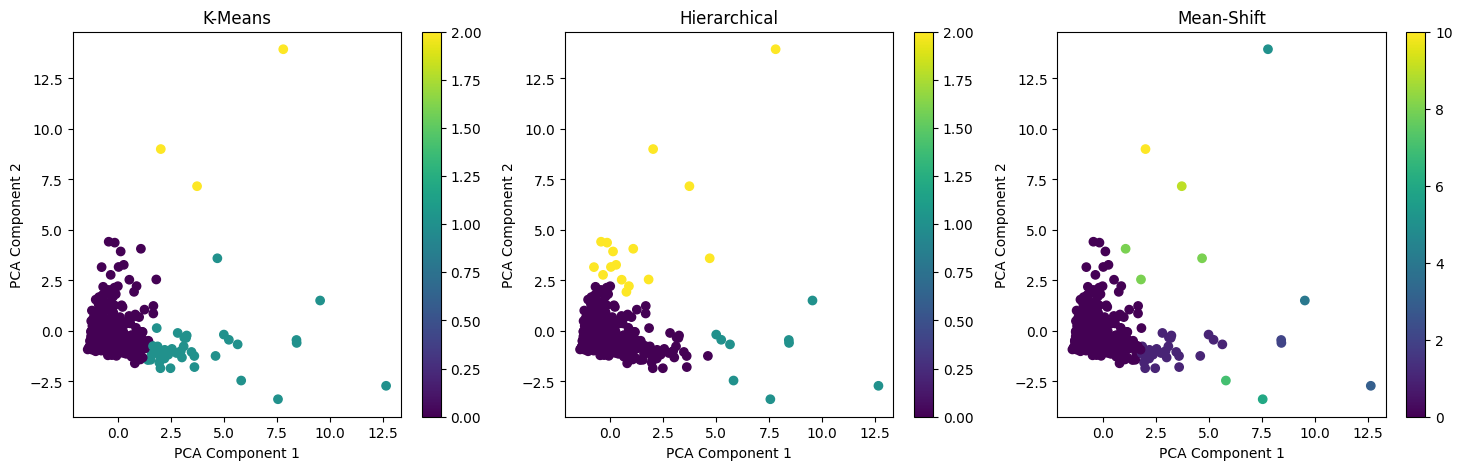

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (method, model) in zip(axes, clustering_methods.items()):
    labels = model.fit_predict(df_pca)
    scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
    ax.set_title(method)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    fig.colorbar(scatter, ax=ax)
    fig.savefig(f"{method}_clusters.png")
    print(f"Cluster visualization saved: {method}_clusters.png")


Dendrogram saved: dendrogram.png


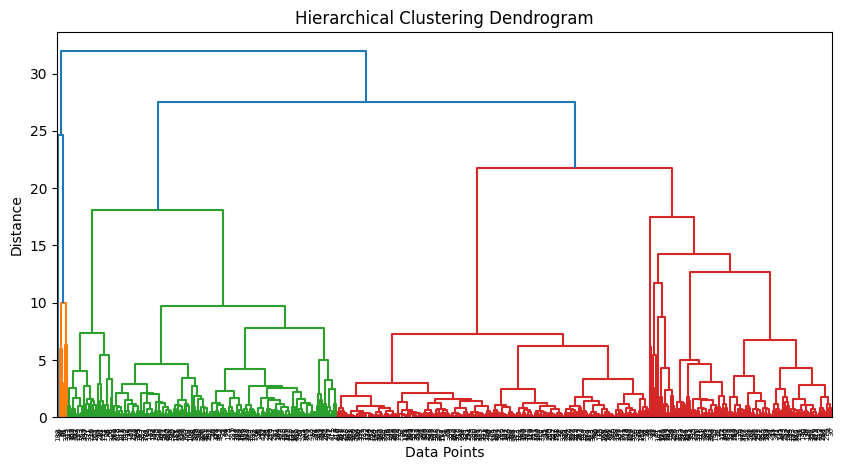

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(linkage(df_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.savefig("dendrogram.png")
print("Dendrogram saved: dendrogram.png")